In [60]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
dataset = pd.read_csv('diabetes.csv')

In [62]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

data = dataset.drop('Outcome', axis = 1)
Y = dataset.Outcome
data_prepared = pipeline.fit_transform(data)
data_train, data_test, Y_train, Y_test = train_test_split(data_prepared, Y, test_size = 0.20)

# Linear regression

In [66]:
linearRegressor = LinearRegression()
randomForestRegressor = RandomForestRegressor()
svmRegressor = svm.SVC()
nBRegressor = GaussianNB()
knnRegressor = KNeighborsClassifier()

In [67]:
param_grid = [
    {
        'copy_X': [False], 'fit_intercept': [False]
    }, 
    {
        'fit_intercept': [False]
    }
]
grid_search = GridSearchCV(linearRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_train,Y_train)

grid_search.best_params_

{'copy_X': False, 'fit_intercept': False}

In [68]:
linearRegressor.fit(data_train, Y_train)
Y_pred = linearRegressor.predict(data_test)

file = open('models/linearRegression.pkl', 'wb')
pickle.dump(linearRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/linearRegressionParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Linear regression прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 0, 0, 0, 0]
Linear regression прогноз Y:
 [0.4933772024671953, 0.26936404545781195, -0.002214919786964642, 0.5562767331722724, 0.08437074089172458]


### Матрица ошибок визуализирует эффективность алгоритма классификации путем сравнения прогнозируемого значения целевой переменной с ее фактическим значением.
### TP - верно спрогнозированные положительные цели.
### FN - фактически положительные цели, которые были спрогнозированы как отрицательные.
### FP - фактически отрицательные цели, которые были спрогнозированы как положительные.
### TN - верно спрогнозированные отрицательные цели.

### Precision - доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.
### Recall - доля объектов положительного класса из всех объектов положительного класса, найденная алгоритмом.
### Accuracy — доля правильных ответов алгоритма.
### F1-score - среднее гармоническое precision и recall.

In [87]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[76 21]
 [25 32]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        97
           1       0.60      0.56      0.58        57

    accuracy                           0.70       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



### ROC-кривая - график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак TPR, и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак FPR при варьировании порога решающего правила.
### Количественная интерпретация ROC даёт показатель AUC - площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор.

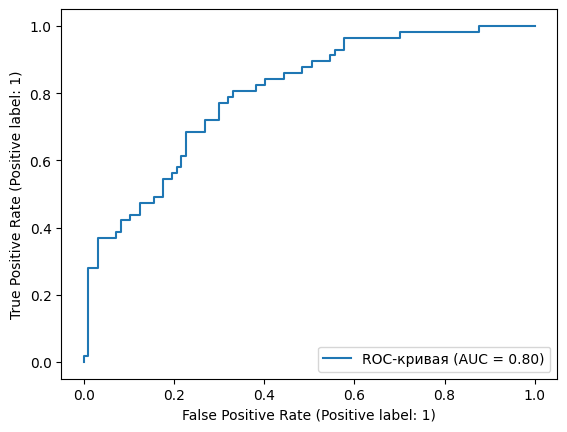

In [70]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# Random forest

In [71]:
randomForestRegressor.get_params()
param_grid = [
    {
        'n_estimators':[4,15,40], 'max_features':[3,5,8]
    }, 
    {
        'bootstrap':[False],'n_estimators':[4,15,40]  
    }
]
grid_search = GridSearchCV(randomForestRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'max_features': 5, 'n_estimators': 40}

In [72]:
randomForestRegressor.fit(data_train, Y_train)
Y_pred = randomForestRegressor.predict(data_test)

file = open('models/randomForest.pkl', 'wb')
pickle.dump(randomForestRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/randomForestParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Random forest прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 0, 0, 0, 0]
Random forest прогноз Y:
 [0.38, 0.35, 0.01, 0.73, 0.1]


In [73]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[71 26]
 [22 35]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        97
           1       0.57      0.61      0.59        57

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



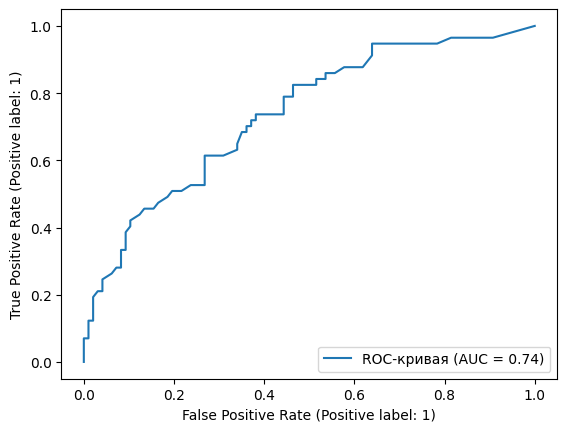

In [74]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# SVM

In [75]:
svmRegressor.get_params()
param_grid = [
    {
        'C': [1, 10, 100, 1000], 'kernel': ['linear']
    }, 
    {
        'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'] 
    }
]
grid_search = GridSearchCV(svmRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [76]:
svmRegressor.fit(data_train, Y_train)
Y_pred = svmRegressor.predict(data_test)

file = open('models/svm.pkl', 'wb')
pickle.dump(svmRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/svmParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("SVM прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 0, 0, 0, 0]
SVM прогноз Y:
 [0, 0, 0, 1, 0]


In [77]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[76 21]
 [28 29]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        97
           1       0.58      0.51      0.54        57

    accuracy                           0.68       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.67      0.68      0.68       154



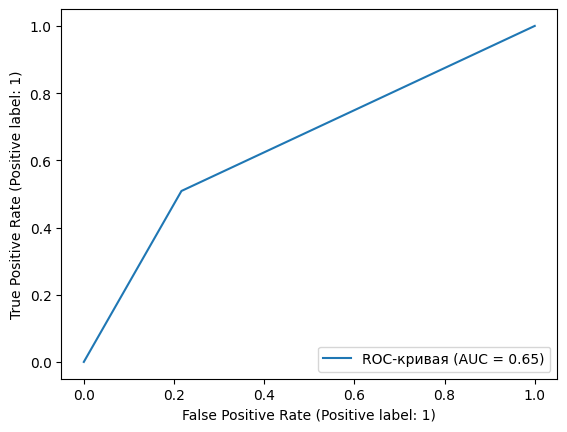

In [78]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# Naive Bayes

In [79]:
nBRegressor.get_params()
param_grid = [
    {
        'var_smoothing':[0.00000001, 0.000001, 0.001]
    } 
]
grid_search = GridSearchCV(nBRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'var_smoothing': 1e-08}

In [80]:
nBRegressor.fit(data_train, Y_train)
Y_pred = nBRegressor.predict(data_test)

file = open('models/nb.pkl', 'wb')
pickle.dump(nBRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/nbParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Naive Bayes прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 0, 0, 0, 0]
Naive Bayes прогноз Y:
 [0, 0, 0, 1, 0]


In [81]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[76 21]
 [27 30]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        97
           1       0.59      0.53      0.56        57

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.68      0.69      0.68       154



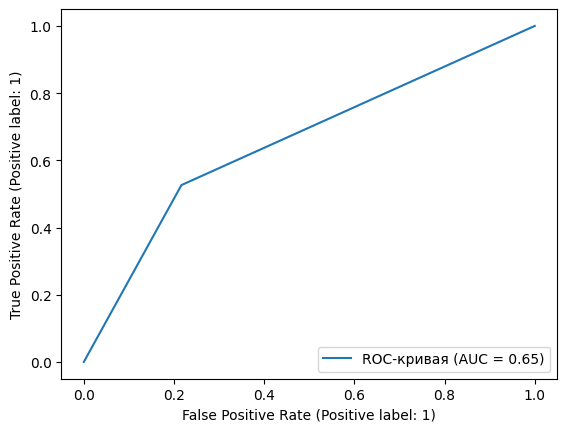

In [82]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

# KNN

In [83]:
knnRegressor.get_params()
param_grid = [
    {
        'leaf_size': [10, 15, 20], 'n_neighbors': [3, 5, 7], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    {
        'leaf_size': [10, 15, 25], 'n_neighbors': [2, 3, 4], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    } 
]
grid_search = GridSearchCV(knnRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}

In [84]:
knnRegressor.fit(data_train, Y_train)
Y_pred = knnRegressor.predict(data_test)

file = open('models/knn.pkl', 'wb')
pickle.dump(knnRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/knnParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("KNN прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 0, 0, 0, 0]
KNN прогноз Y:
 [0, 0, 0, 0, 0]


In [85]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[76 21]
 [25 32]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        97
           1       0.60      0.56      0.58        57

    accuracy                           0.70       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



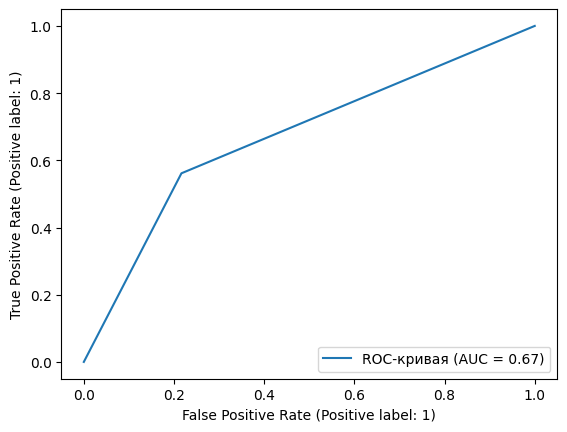

In [86]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")